# Exploring CNN learning with TensorFlow

In this assignment we will work again with the [Fashion MNIST Dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data). This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 

A base notebook is provide for you to start. Complete the values when required, for example:
- VALUE = #ENTER YOUR VALUE; This will initialize a variable that will be used on the code.

Once you run the model at least once without errors, try change the given hyperparameters, as number of filters, layers and neurons (units). Comment your obsevations. 

Try to modify the notebook, creating functions to show the images, together with their labels. Save the model and explored it with Netron.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


##  Visualizing the Image Data

In [ ]:
x_train.shape

(60000, 28, 28)

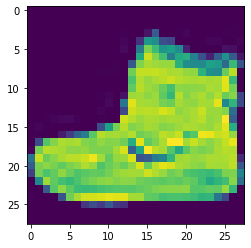

In [ ]:
plt.imshow(x_train[0]);

# PreProcessing Data

Let's change the labels to categorical (it is not necessary, but it is good to explore it). PAY ATTENTION TO LOSS, when compiling.

## Labels

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

The labels are literally categories of numbers, so we will translate them to be "one hot encoded":

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_cat_test = to_categorical(y_test,10)
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_train.shape

(60000, 10)

In [ ]:
# verifing one sample label
print(y_train[0])
print(y_cat_train[0])
print(y_train[1])
print(y_cat_train[1])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Processing X Data

We should normalize the X data

In [ ]:
x_train.max()

255

In [ ]:
x_train.min()

0

In [ ]:
VALUE = 255

In [ ]:
x_train = x_train/VALUE
x_test = x_test/VALUE

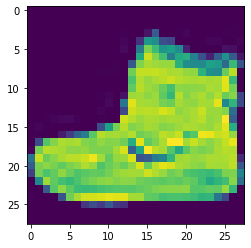

In [ ]:
plt.imshow(x_train[0]);

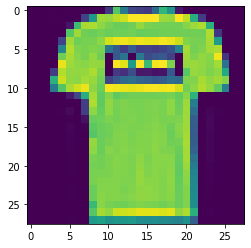

In [ ]:
plt.imshow(x_train[1]);

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

For to use it with CNN, we need to add one more dimension to show we're dealing with 1 RGB channel 
- The images are in black and white, only showing values from 0-255 on a single channel, an color image would have 3 dimensions.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

Reshaping to include channel dimension (in this case, 1 channel)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [ ]:
# batch_size, width, height, color_channels
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

## Create Model Arquitecture and Compile

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
LAYER_ACTIVATION = 'relu'
LAST_LAYER_ACTIVATION = 'softmax'
OUTPUT_LAYER_NEURONS = 64
LOSS = 'sparse_categorical_crossentropy'
OPT = Adam(learning_rate=0.0001)

In [ ]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(4, 4),
        input_shape=(28, 28, 1),
        activation=LAYER_ACTIVATION,
    ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=LAYER_ACTIVATION))
model.add(Dense(OUTPUT_LAYER_NEURONS, activation=LAST_LAYER_ACTIVATION))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 598,752
Trainable params: 598,752
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy']) 

## Train the Model

Let's add a callback, "EarlyStopping". This one of the techinics to prevent overfitting.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
EPOCHS = 20
VAL_SPLIT = 0.1 

In [ ]:
history = model.fit(x_train,
                    y_cat_train,
                    epochs=EPOCHS,
                    validation_split=VAL_SPLIT,
                    callbacks=[early_stop])

Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: ignored

## Evaluate the Model

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


InvalidArgumentError: ignored

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions.shape

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
predictions[0]

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,predictions), cmap='Blues', annot=True, fmt='g');